# Employee Details and Sentiment Analysis

In [2]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import random
import warnings
warnings.filterwarnings("ignore")
connection = sql.connect(user='root', host='localhost', port=3306, password='rahul@SQL', database='employees_dataset')
emp_details = 'SELECT * FROM employee_details'
emp = pd.read_sql(emp_details, con=connection)
connection.close()
emp.head(5)


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,EduLevel
0,1,Female,37,Married,Senior,5,Operations,Full-Time,Bachelor
1,2,Female,32,Single,Senior,10,HR,Full-Time,Bachelor
2,3,Male,31,Married,Senior11111212121,6,Legal,Contract,Master
3,4,Male,31,Married,Mid,2,Finance,Full-Time,Bachelor
4,5,Male,22,Single,Intern/Fresher,0,IT,Contract,High School


### Cleaning and Structuring DataFrame

In [3]:
emp.info()
print("\n NULL VALUES")
emp.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmpID          3029 non-null   int64 
 1   Gender         3029 non-null   object
 2   Age            3029 non-null   int64 
 3   MaritalStatus  3029 non-null   object
 4   JobLevel       3029 non-null   object
 5   Experience     3029 non-null   int64 
 6   Dept           3028 non-null   object
 7   EmpType        3023 non-null   object
 8   EduLevel       3029 non-null   object
dtypes: int64(3), object(6)
memory usage: 213.1+ KB

 NULL VALUES


EmpID            0
Gender           0
Age              0
MaritalStatus    0
JobLevel         0
Experience       0
Dept             1
EmpType          6
EduLevel         0
dtype: int64

In [4]:
emp["Dept"].ffill(inplace=True)
emp.head(5)
emp["EmpType"].ffill(inplace=True)
emp.head(5)

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,EduLevel
0,1,Female,37,Married,Senior,5,Operations,Full-Time,Bachelor
1,2,Female,32,Single,Senior,10,HR,Full-Time,Bachelor
2,3,Male,31,Married,Senior11111212121,6,Legal,Contract,Master
3,4,Male,31,Married,Mid,2,Finance,Full-Time,Bachelor
4,5,Male,22,Single,Intern/Fresher,0,IT,Contract,High School


In [30]:
emp.info()
print("\n NULL VALUES")
emp.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmpID          3029 non-null   int64 
 1   Gender         3029 non-null   object
 2   Age            3029 non-null   int64 
 3   MaritalStatus  3029 non-null   object
 4   JobLevel       3029 non-null   object
 5   Experience     3029 non-null   int64 
 6   Dept           3029 non-null   object
 7   EmpType        3029 non-null   object
 8   EduLevel       3029 non-null   object
dtypes: int64(3), object(6)
memory usage: 213.1+ KB

 NULL VALUES


EmpID            0
Gender           0
Age              0
MaritalStatus    0
JobLevel         0
Experience       0
Dept             0
EmpType          0
EduLevel         0
dtype: int64

In [5]:
emp.drop_duplicates(inplace=True)

In [6]:
jl = emp['JobLevel'].unique()
emp['JobLevel'].replace('Senior11111212121','Senior',inplace=True)
emp.head(5)
ms = emp['MaritalStatus'].unique()
gd = emp['Gender'].unique()
dt = emp['Dept'].unique()
jb = emp['JobLevel'].unique()
et = emp['EmpType'].unique()
ed = emp['EduLevel'].unique()
print(ms, gd, dt, et, ed, jb)

['Married' 'Single' 'Divorced' 'Widowed'] ['Female' 'Male' 'Other'] ['Operations' 'HR' 'Legal' 'Finance' 'IT' 'Marketing' 'Customer Service'
 'Sales'] ['Full-Time' 'Contract' 'Part-Time'] ['Bachelor' 'Master' 'High School' 'PhD' 'Bachelor7'] ['Senior' 'Mid' 'Intern/Fresher' 'Junior' 'Lead']


In [7]:
emp['EduLevel'].replace('Bachelor7','Bachelor',inplace=True)

In [8]:
#Getting total employee count by gender
emp_countbygender = emp.groupby('Gender')['EmpID'].count().reset_index()
print(emp_countbygender)

   Gender  EmpID
0  Female   1240
1    Male   1528
2   Other    257


In [9]:
#getting count of employee by gender in each department
emp_countbygender_dept = emp.groupby(['Gender','Dept'])['EmpID'].count()
emp_countbygender_dept

Gender  Dept            
Female  Customer Service     72
        Finance             291
        HR                   80
        IT                  134
        Legal               122
        Marketing           202
        Operations          207
        Sales               132
Male    Customer Service     65
        Finance             275
        HR                   50
        IT                  590
        Legal               127
        Marketing            90
        Operations          203
        Sales               128
Other   Customer Service     10
        Finance              71
        HR                   13
        IT                   50
        Legal                23
        Marketing            24
        Operations           45
        Sales                21
Name: EmpID, dtype: int64

In [10]:
#employee count by Experience
emp_countybyexp = emp.groupby('Experience', as_index=False)['EmpID'].count()
emp_countybyexp

,Experience,EmpID
0,0,159
1,1,246
2,2,254
3,3,186
4,4,171
5,5,151
6,6,170
7,7,154
8,8,134
9,9,134


In [11]:
#Count of employess type in each department
emp_countby_emptype_in_each_dept = emp.groupby(['EmpType'])['Dept'].count().reset_index()
emp_countby_emptype_in_each_dept

,EmpType,Dept
0,Contract,308
1,Full-Time,2077
2,Part-Time,640


In [12]:
emp_countby_joblevel = emp.groupby(['JobLevel'])['EmpID'].count().reset_index()
clr = ['#'+''.join(random.choices('ABCDEF0123456789',k=6)) for i in range(len(emp_countby_joblevel))]
emp_countby_joblevel

,JobLevel,EmpID
0,Intern/Fresher,202
1,Junior,602
2,Lead,386
3,Mid,766
4,Senior,1069


# Employee Sentiment Analysis

In [13]:
connection = sql.connect(user='root', host='localhost', port=3306, password='rahul@SQL', database='employees_dataset')
emp_sentiment = 'SELECT * FROM employee_sentiment'
emp_senti = pd.read_sql(emp_sentiment, con=connection)
connection.close()
emp_senti

#ensuring both emp and emp_senti tables have same number of rows
print(emp.info())
print("\n NULL VALUES")
print(emp.isnull().sum())

print(emp_senti.info())
print("\n NULL VALUES")
print(emp_senti.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3025 entries, 0 to 3028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmpID          3025 non-null   int64 
 1   Gender         3025 non-null   object
 2   Age            3025 non-null   int64 
 3   MaritalStatus  3025 non-null   object
 4   JobLevel       3025 non-null   object
 5   Experience     3025 non-null   int64 
 6   Dept           3025 non-null   object
 7   EmpType        3025 non-null   object
 8   EduLevel       3025 non-null   object
dtypes: int64(3), object(6)
memory usage: 236.3+ KB
None

 NULL VALUES
EmpID            0
Gender           0
Age              0
MaritalStatus    0
JobLevel         0
Experience       0
Dept             0
EmpType          0
EduLevel         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------ 

In [14]:
#Joining two dataframe emp and emp_senti
emp_sentiment=pd.merge(emp,emp_senti)

emp_sentiment.head(5)

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,EduLevel,WLB,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,haveOT,TrainingHoursPerYear,JobSatisfaction,EmpID_[0]
0,1,Female,37,Married,Senior,5,Operations,Full-Time,Bachelor,5,...,8.2,Motorbike,18,5,24,7,FALSE,42.5,5,1
1,2,Female,32,Single,Senior,10,HR,Full-Time,Bachelor,5,...,6.7,Motorbike,13,3,16,5,FALSE,45.0,4,2
2,3,Male,31,Married,Senior,6,Legal,Contract,Master,3,...,7.4,Public Transport,7,3,21,7,FALSE,43.0,5,3
3,4,Male,31,Married,Mid,2,Finance,Full-Time,Bachelor,5,...,7.0,Car,14,3,15,0,FALSE,31.0,5,4
4,5,Male,22,Single,Intern/Fresher,0,IT,Contract,High School,1,...,5.5,Car,22,0,27,0,TRUE,10.0,5,5


In [15]:
#Employee Job statification
empjobstatis=emp_sentiment.groupby('Gender')['JobSatisfaction'].mean().reset_index()
empjobstatis

,Gender,JobSatisfaction
0,Female,3.405738
1,Male,3.304462
2,Other,3.333333


In [16]:
#Employee Job statification by Gender
empjobstatis=emp_sentiment.groupby('Gender')['JobSatisfaction'].mean().reset_index()
empjobstatis

,Gender,JobSatisfaction
0,Female,3.405738
1,Male,3.304462
2,Other,3.333333


In [17]:
## Employee stress rating by gender
empstress = emp_sentiment.groupby('Gender')['Stress'].mean().reset_index()
empstress

,Gender,Stress
0,Female,1.741803
1,Male,1.744094
2,Other,2.000000


In [44]:
#WLB rating
empwlb = emp_sentiment.groupby('Gender')['WLB'].mean().reset_index()
empwlb

,Gender,WLB
0,Female,3.057377
1,Male,3.030184
2,Other,3.222222


In [45]:
#work Environment Rating
empenv = emp_sentiment.groupby('Gender')['WorkEnv'].mean().reset_index()
empenv

,Gender,WorkEnv
0,Female,3.032787
1,Male,2.992126
2,Other,3.277778


In [47]:
#workload Rating
empworkload = emp_sentiment.groupby('Gender')['Workload'].mean().reset_index()
empworkload

#merging three rating
merged_df1 = pd.merge(empwlb, empenv, on='Gender', how='inner')
merged_df2 = pd.merge(merged_df1, empworkload, on='Gender', how='inner')
merged_df3 = pd.merge(merged_df2, empstress, on='Gender', how='inner')
merged_df = pd.merge(merged_df3, empjobstatis, on='Gender', how='inner')
merged_df

df = pd.DataFrame(merged_df)
df

,Gender,WLB,WorkEnv,Workload,Stress,JobSatisfaction
0,Female,3.057377,3.032787,3.034836,1.741803,3.405738
1,Male,3.030184,2.992126,3.036745,1.744094,3.304462
2,Other,3.222222,3.277778,2.555556,2.000000,3.333333


# Visualizing the result

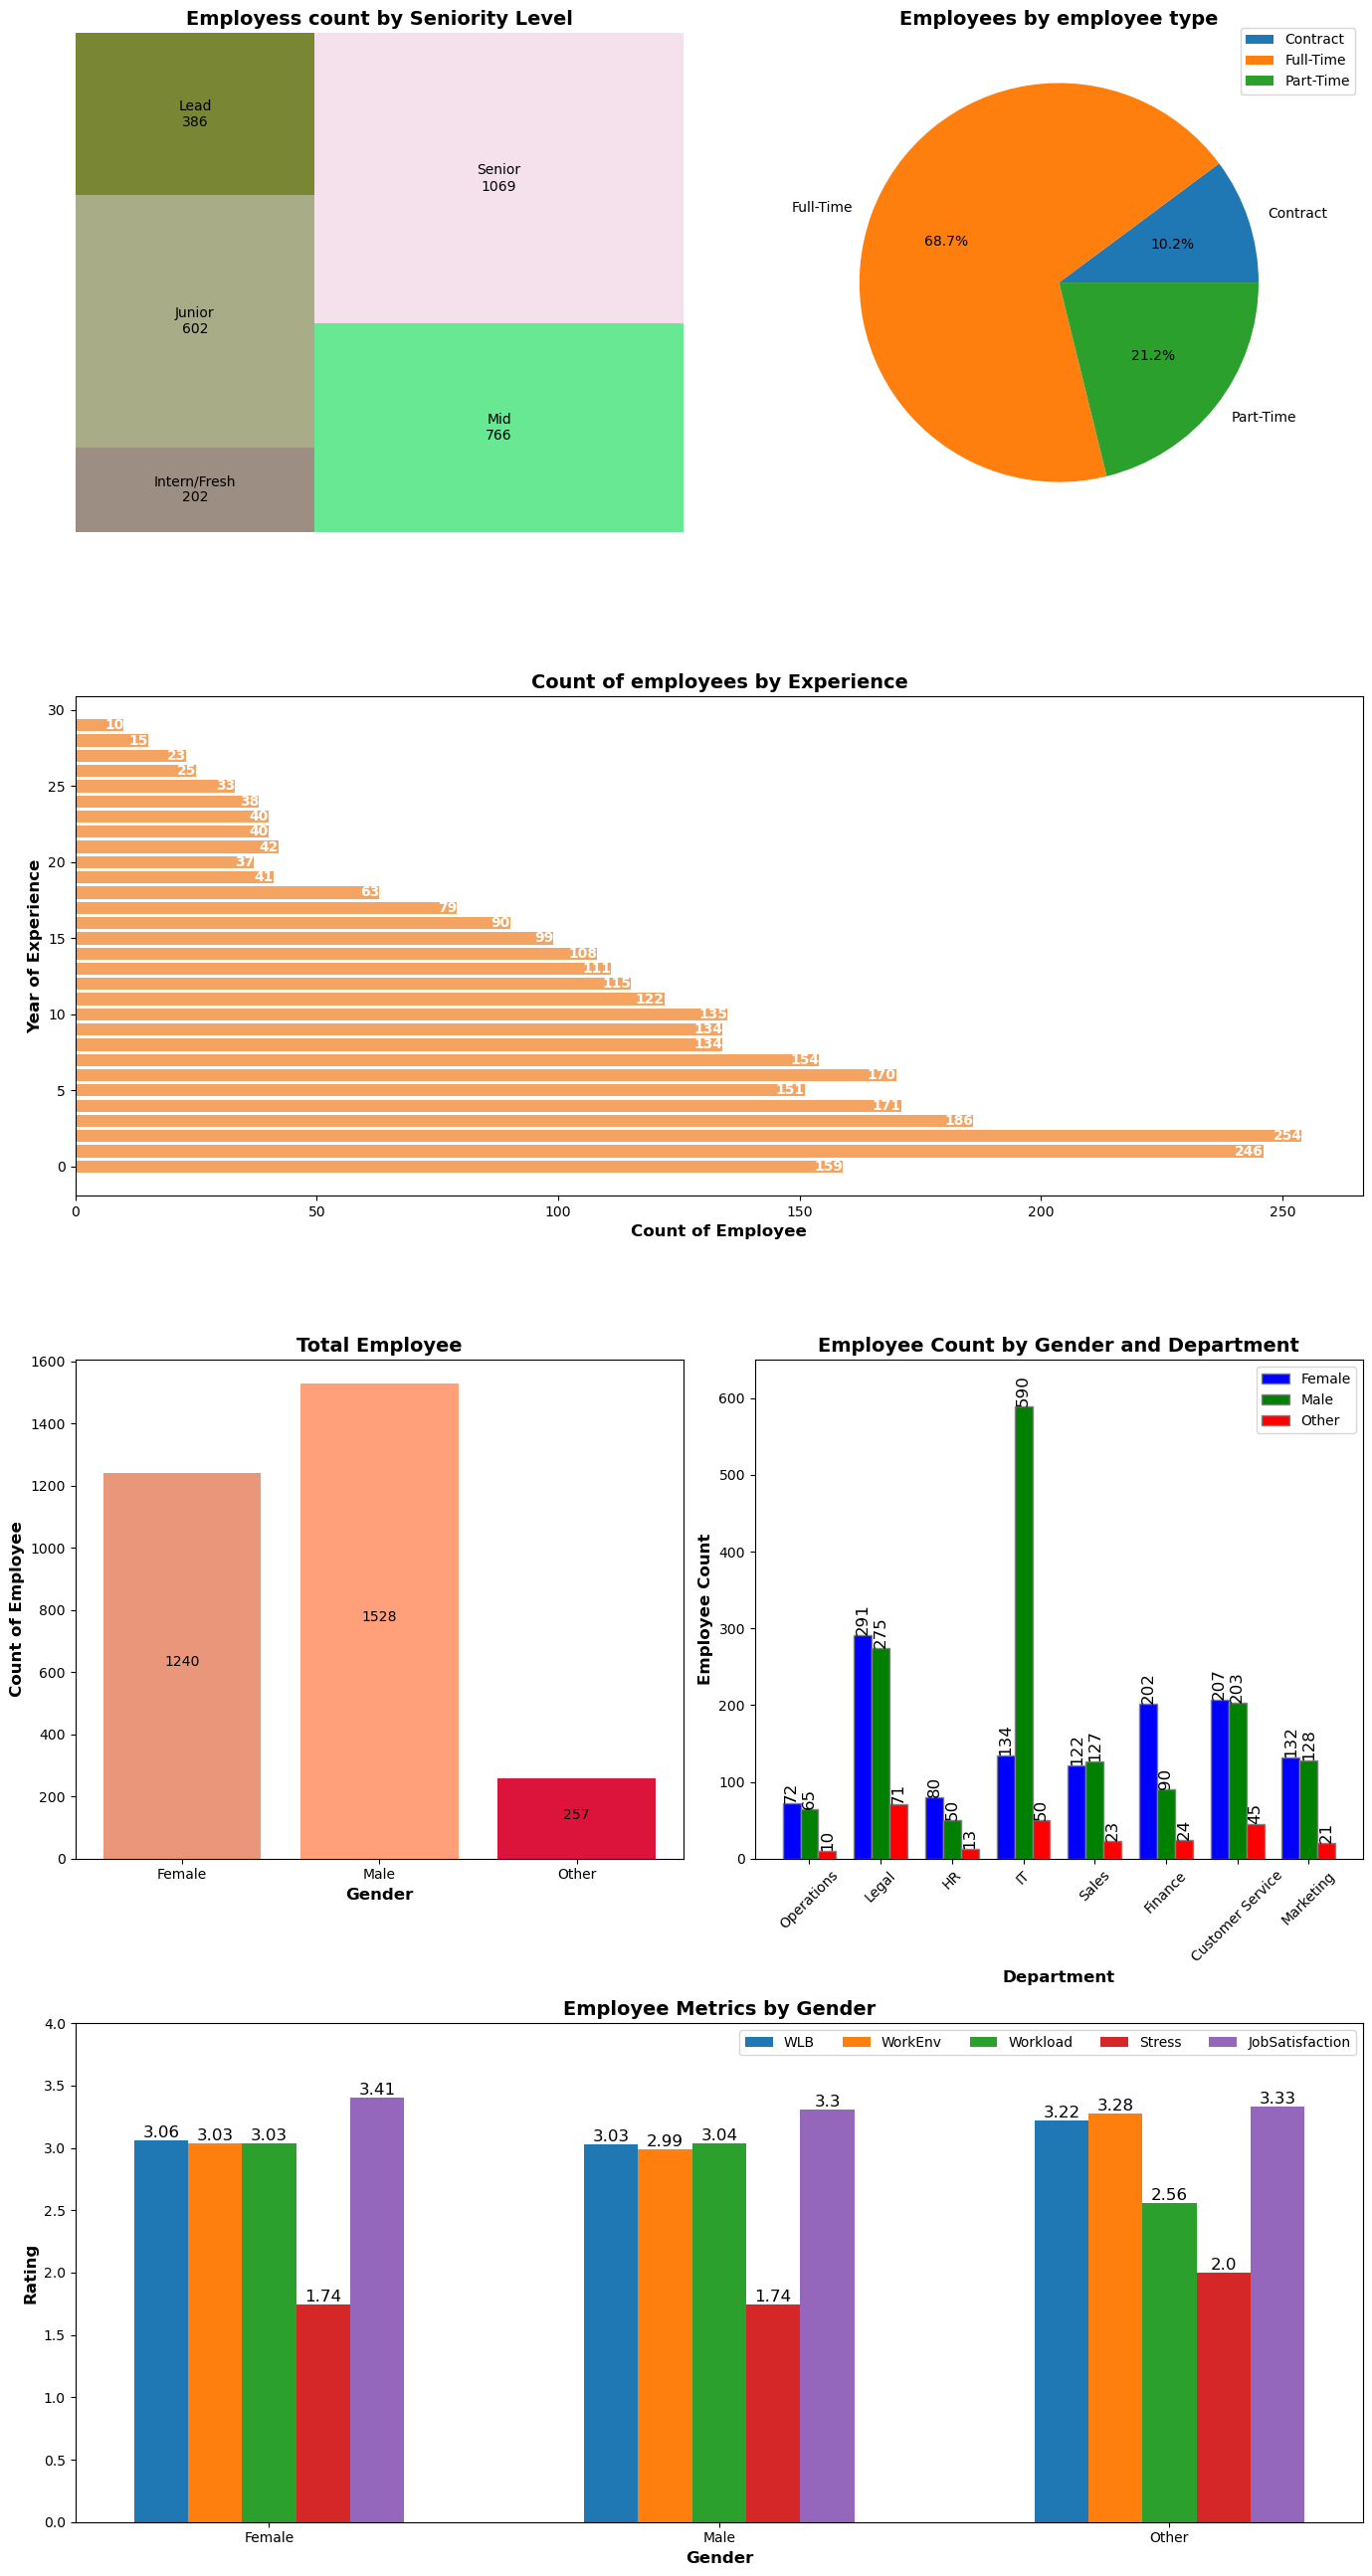

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify
import random


plt.figure(figsize=(14,26))
clr = ['#'+''.join(random.choices('ABCDEF0123456789',k=6)) for i in range(len(emp_countby_joblevel))]
#TreeMap Chart employess by Seniority Level

plt.subplot2grid((4, 2), (0, 0))
emp_countby_joblevel

squarify.plot(sizes=emp_countby_joblevel['EmpID'], label = ['Intern/Fresh\n202','Junior\n602','Lead\n386','Mid\n766','Senior\n1069'],color=clr, alpha=.8 )
plt.axis('off')
plt.title("Employess count by Seniority Level", fontsize=14, fontweight='bold')

#================================================================================================
#Pie Chart employees by employee type

plt.subplot2grid((4, 2), (0, 1))
plt.pie(emp_countby_emptype_in_each_dept['Dept'], labels = emp_countby_emptype_in_each_dept['EmpType'],autopct='%1.1f%%')
plt.legend(labels = emp_countby_emptype_in_each_dept['EmpType'], bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title("Employees by employee type", fontsize=14, fontweight='bold')
#================================================================================================
#Bar chart employees by experience

plt.subplot2grid((4, 2), (1, 0), colspan=2)
emp_countybyexp
exp = [i for i in emp_countybyexp['Experience'].unique()]
exp_count = [i for i in emp_countybyexp['EmpID']]

plt.barh(exp, exp_count, color='#F4A460')
plt.title("Count of employees by Experience", fontsize=14, fontweight='bold')
plt.xlabel("Count of Employee", fontweight='bold', fontsize=12)
plt.ylabel("Year of Experience", fontweight='bold', fontsize=12)
for index, value in enumerate(exp_count):
    plt.text(value, index, str(value), va='center', ha='right', fontweight='bold', fontsize=10, color='white')
plt.tight_layout()
#================================================================================================
# Column chart employees by Gender
plt.subplot2grid((4, 2), (2, 0))

emp_countbygender
emp_countbygender = emp.groupby('Gender', as_index=False)['EmpID'].count()
clr = ['#E9967A', '#FFA07A', '#DC143C']

plt.bar(emp_countbygender['Gender'], emp_countbygender['EmpID'], color=clr)
plt.title("Total Employee", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontweight='bold', fontsize=12)
plt.ylabel("Count of Employee", fontweight='bold', fontsize=12)
for i in range(len(emp_countbygender['EmpID'])):
    plt.text(i, emp_countbygender['EmpID'][i]//2, emp_countbygender['EmpID'][i], ha = 'center')

#================================================================================================
# Clustered column chart employees in each department and gender_wise

plt.subplot2grid((4, 2), (2, 1))
emp_countbygender_dept = emp.groupby(['Gender', 'Dept'], as_index=False)['EmpID'].count()

gender_list = emp_countbygender_dept['Gender'].tolist()
dept = emp_countbygender_dept['Dept'].tolist()
values = emp_countbygender_dept['EmpID'].tolist()
data = {'Gender_list': gender_list, 'Dept': dept, 'value': values}
df = pd.DataFrame(data)

bar_width = 0.25
r1 = np.arange(len(set(dept))) 
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


female_values = df[df['Gender_list'] == 'Female']['value'].values
male_values = df[df['Gender_list'] == 'Male']['value'].values
other_values = df[df['Gender_list'] == 'Other']['value'].values

bars1 = plt.bar(r1, female_values, color='blue', width=bar_width, edgecolor='grey', label='Female')
bars2 = plt.bar(r2, male_values, color='green', width=bar_width, edgecolor='grey', label='Male')
bars3 = plt.bar(r3, other_values, color='red', width=bar_width, edgecolor='grey', label='Other')

plt.xlabel('Department', fontweight='bold', fontsize=12)
plt.ylabel('Employee Count', fontweight='bold', fontsize=12)
plt.title('Employee Count by Gender and Department', fontsize=14, fontweight='bold')
plt.xticks([r + bar_width for r in range(len(set(dept)))], set(dept), rotation=45)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12, rotation=90)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12, rotation=90)

for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12, rotation=90)

plt.ylim((0,650))
plt.legend()
#================================================================================================
# Clustered column chart on employees sentiment rating over Stress, Work Environment, Work Load, Job Satisfaction and Work Life Balance

plt.subplot2grid((4, 2), (3, 0), colspan=2)
#workload Rating
empworkload = emp_sentiment.groupby('Gender')['Workload'].mean().reset_index()
empworkload

#merging three rating
merged_df1 = pd.merge(empwlb, empenv, on='Gender', how='inner')
merged_df2 = pd.merge(merged_df1, empworkload, on='Gender', how='inner')
merged_df3 = pd.merge(merged_df2, empstress, on='Gender', how='inner')
merged_df = pd.merge(merged_df3, empjobstatis, on='Gender', how='inner')
merged_df

df = pd.DataFrame(merged_df)

metrics = ['WLB', 'WorkEnv', 'Workload', 'Stress', 'JobSatisfaction']

bar_width = 0.12
index = np.arange(len(df['Gender']))



for i, metric in enumerate(metrics):
    bars = plt.bar(index + i * bar_width, df[metric], bar_width, label=metric)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.xlabel('Gender', fontweight='bold', fontsize=12)
plt.ylabel('Rating', fontweight='bold', fontsize=12)
plt.title('Employee Metrics by Gender', fontsize=14, fontweight='bold')

plt.xticks(index + bar_width * 2, df['Gender'])
plt.legend(loc='upper right', ncols=5)
plt.ylim((0,4))


plt.tight_layout()

plt.show()

                                                        SUMMARY
The company's performance in key employee areas, such as stress, workload, work-life balance, and work environment, shows mixed results based on employee ratings. Stress received a low rating of 1.8 out of 5, indicating high levels of stress among employees. The workload, work-life balance, and work environment each received a moderate rating of 2.8 out of 5, suggesting that there is room for improvement in these areas as well.

To improve, the company can focus on reducing employee stress by offering stress management programs, revisiting workloads to ensure they are manageable, promoting a healthy work-life balance through flexible scheduling or remote work options, and enhancing the work environment by encouraging open communication and support systems.